# Workshop: Data Visualization in Python

The goal of this notebook is to introduce you to the essentials of creating clear and effective graphics in Python.

**How this differs from the R notebook:**  
Python and R have different workflows. In this notebook we’ll follow a **Pythonic path**:  
1. Start with [**Pandas’ built-in plotting**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for quick exploratory charts  
2. Move to [**Matplotlib**](https://matplotlib.org/) for full flexibility and fine-grained control  
3. Use [**Seaborn**](https://seaborn.pydata.org/) for high-level, grammar-of-graphics–inspired plots with smarter defaults  
4. And finally, show how to use [**plotnine**](https://plotnine.readthedocs.io/) if you want a **`ggplot2`-style workflow** in Python  

**All tasks are the same as in the R notebook** — only the order and libraries differ, reflecting Python’s way of doing things.

You will learn how to:
- Create common plots (histograms, scatterplots, bar charts, box/violin plots, line charts)  
- Map variables to visual properties (color, style, size)  
- Adjust scales, labels, themes, and layouts for clarity  
- Split figures into facets and combine multiple layers  
- **Save figures** for reports and publications  

By the end, you should feel comfortable using Python to **explore your data visually**, and to produce **publication-quality graphics** using whichever library best fits your workflow.


## Dataset  

In this workshop, we will work with the [**palmerpenguins**](https://allisonhorst.github.io/palmerpenguins/) dataset.  
It provides real biological measurements of three penguin species (*Adélie*, *Chinstrap*, and *Gentoo*) collected by Dr. Kristen Gorman and the Palmer Station Long Term Ecological Research (LTER) program in Antarctica’s Palmer Archipelago.  

The dataset is widely used for teaching data visualization and data science in both R and Python because it contains:  
- **Multiple species** (stored as a categorical column in a `pandas.DataFrame`, useful for color or faceting)  
- **Continuous measurements** such as bill length/depth, flipper length, and body mass (float columns, great for scatterplots, histograms, and boxplots)  
- **Categorical context** such as island and sex (string/object columns, helps practice grouping and comparisons)  
- **Some missing values** (`NaN`), which makes it a bit more realistic than perfectly clean toy data  

Each row in the dataset corresponds to a single penguin (a record in the DataFrame), and the main columns are:  

| Column             | Description                                         | Python data type (pandas) |  
|--------------------|-----------------------------------------------------|---------------------------|  
| `species`          | Penguin species (*Adélie*, *Chinstrap*, *Gentoo*)   | categorical (`category`)  |  
| `island`           | Island in the Palmer Archipelago where observed     | categorical (`object`)    |  
| `bill_length_mm`   | Length of the penguin’s bill (mm)                   | numeric (`float64`)       |  
| `bill_depth_mm`    | Depth (thickness) of the penguin’s bill (mm)        | numeric (`float64`)       |  
| `flipper_length_mm`| Length of the penguin’s flipper (mm)                | numeric (`float64`) |  
| `body_mass_g`      | Body mass of the penguin (g)                        | numeric (`int64`)         |  
| `sex`              | Male or female (some values missing)                | categorical (`object`)    |  
| `year`             | Year of observation (2007–2009)                     | numeric (`int64`)         |  

![palmer_penguins.png](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)  

This dataset gives us plenty of opportunities to practice **mapping DataFrame columns to visual encodings** and to explore **comparisons across groups, relationships between measurements, and distributions of traits**.  


## Installing and Loading Packages  

Before we start working with data, we need to make sure the required packages are installed.  

> **Best practice:**  
> Always keep all your imports (`import...`) together at the very top of your script or notebook.  
>
> Why?  
> - It makes your code easier to read: anyone can immediately see which tools you are using.  
> - It avoids errors later, since all dependencies are loaded before running the main analysis.  
> - It makes your work reproducible: when you share your notebook, others can quickly install/load the same packages.  
>
> <font color='gold'> **Therefore, for all homeworks, your code should start with the imports at the top.** </font>

In [ ]:
'''  If you work on your own computer, you usually install a package only once.
However, since we are using Google Colab, the environment resets every time you start a new session.
That means you will need to run the installation commands at the beginning of each notebook '''
!pip install palmerpenguins
!pip install plotnine

In [ ]:
# Load packages (every time you start a new session):
import numpy as np                             # numerical computing: arrays, math functions, statistics
import pandas as pd                            # data manipulation and analysis (tables, DataFrames)

import matplotlib.pyplot as plt                # base plotting library for Python (low-level control)
from matplotlib.lines import Line2D            # utility for creating custom legend entries (shapes, markers)

import seaborn as sns                          # high-level plotting library (statistical graphics, built on Matplotlib)

import plotnine as p9                          # plotting library with syntax similar to ggplot2

from palmerpenguins import load_penguins       # function to load the Palmer Penguins dataset


Now that we have installed and loaded our packages, let’s load the `palmerpenguins` dataset and take a first look at it.

In [ ]:
# Load the penguins dataset
penguins = load_penguins()

# Preview the first rows
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Check dimensions (rows x columns)
penguins.shape

(344, 8)

In [ ]:
# Quick summary of all variables
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


## Plotting with Pandas

Before diving into `Matplotlib` and `Seaborn`, it’s useful to know that **`Pandas` has built-in plotting methods**.  
These methods are quick and convenient because they work directly on `DataFrame` and `Series` objects.  
Under the hood, `Pandas` uses `Matplotlib`, but the syntax is simpler.

> **General pattern:**  
>```python
> DataFrame.plot(kind="plot_type", ...)
> Series.plot(kind="plot_type", ...)
> ```
> **Plot types (`kind`)**:
> - `"line"` : line plot (default)  
> - `"bar"` : vertical bar plot  
> - `"barh"` : horizontal bar plot  
> - `"hist"` : histogram  
> - `"box"` : boxplot  
> - `"kde"` : Kernel Density Estimation plot  
> - `"density"` : same as `"kde"`  
> - `"area"` : area plot  
> - `"pie"` : pie chart  
> - `"scatter"` : scatter plot (**DataFrame only**)  
> - `"hexbin"` : hexbin plot (**DataFrame only**)  

#### Histogram

Let’s start with a simple histogram of penguin flipper lengths.  
We can use the `kind='hist'` argument inside `.plot()`.
> (*Histograms are great for showing the distribution of one numeric variable.*)

<Axes: ylabel='Frequency'>

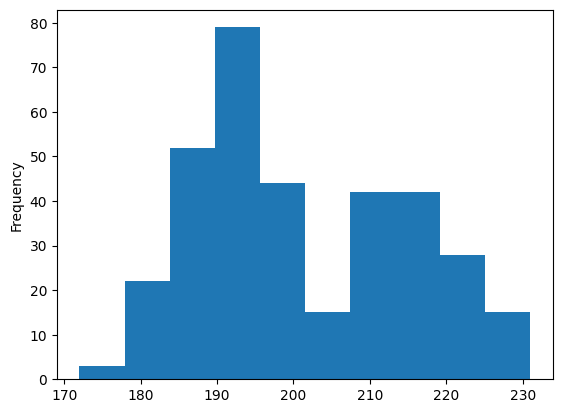

In [ ]:
# Basic histogram of flipper length
penguins["flipper_length_mm"].plot(kind='hist')

That already works, but `Pandas` also gives us **method-specific shortcuts**.  
For example, instead of `kind='hist'`, we can directly use `.plot.hist()`.  
This also allows us to add more options for customization.

<Axes: title={'center': 'Distribution of Flipper Length'}, ylabel='Frequency'>

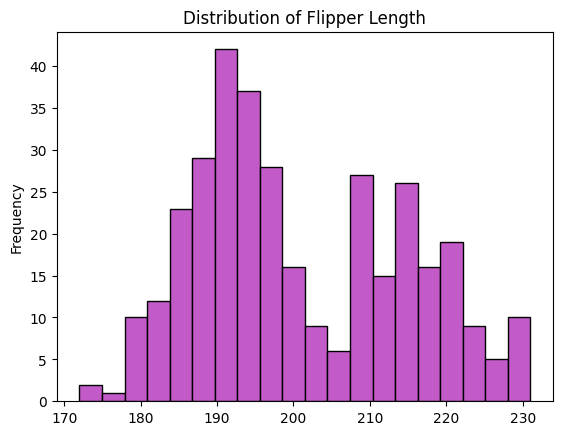

In [ ]:
# Histogram of flipper length with extra options
penguins["flipper_length_mm"].plot.hist(
    bins=20,                 # number of bins
    color="#c25bc8",         # fill color
    edgecolor="black",       # outline for bars
    title="Distribution of Flipper Length"  # figure title
)

### Density Plot
A **density plot** (Kernel Density Estimate, or KDE) is a smoothed version of the histogram. Instead of showing counts per bin, it estimates the probability density of the variable.  

This is useful for seeing the *overall distribution shape* without being sensitive to the choice of bin width.

<Axes: ylabel='Density'>

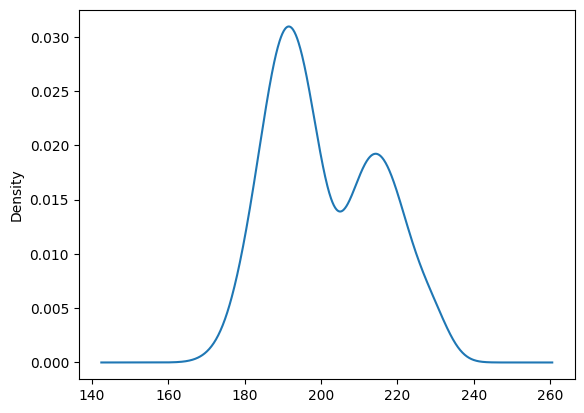

In [ ]:
# Basic density plot of flipper length
penguins["flipper_length_mm"].plot.kde()


That gives us the smoothed curve.  But we can also customize its appearance.

<Axes: title={'center': 'Density of Flipper Length'}, ylabel='Density'>

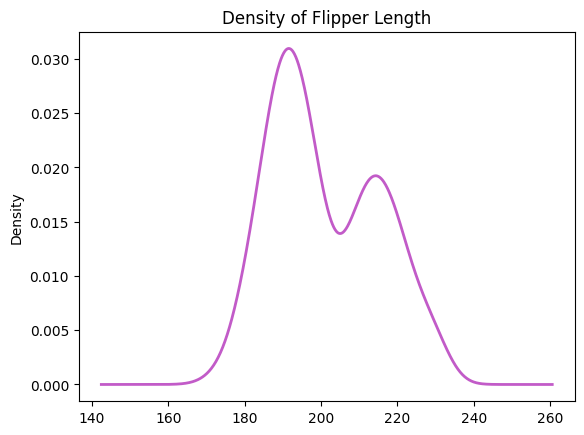

In [ ]:
# KDE with formatting
penguins["flipper_length_mm"].plot.kde(
    lw=2,                      # line width
    color="#c25bc8",           # line color
    title="Density of Flipper Length"
)


> *Notes:*
> - `.plot.kde()` is the same as `.plot(kind="kde")` or `.plot.density()`  
> - KDE plots assume a **continuous numeric variable**  


### Boxplot

Boxplots are excellent for comparing the **distribution of a numeric variable across categories**.  
They show:
- Median (line inside the box)  
- Interquartile range (the box)  
- Whiskers (spread of most of the data)
- Potential outliers (points beyond whiskers)

> *We will talk more about these concepts in the **first lectures** when discussing descriptive statistics.*  

<Axes: title={'center': 'body_mass_g'}, xlabel='species'>

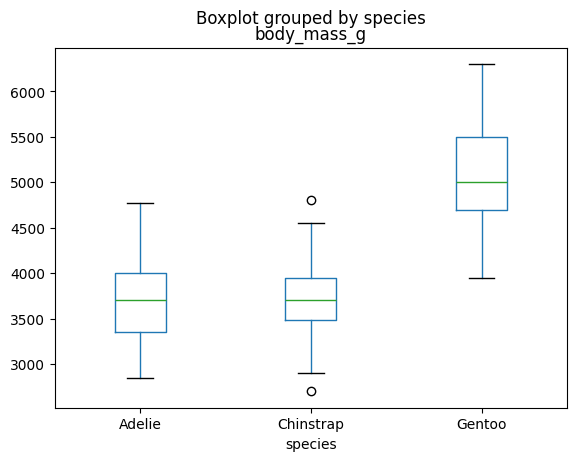

In [ ]:
# Basic boxplot of body mass by species
penguins.boxplot(
    column="body_mass_g",     # numeric variable
    by="species",             # grouping category
    grid=False
)


> *Notes:*
> - `column=...` → numeric column(s) to plot  
> - `by=...` → categorical column used for grouping  
>
>
> *Boxplots are **very powerful for grouped comparisons** and are often used together with violin plots (we’ll get to that in `Seaborn` section).*


### Bar Chart

Bar charts are very useful for comparing **counts across categories**.


<Axes: title={'center': 'Number of Penguins per Species'}, xlabel='species'>

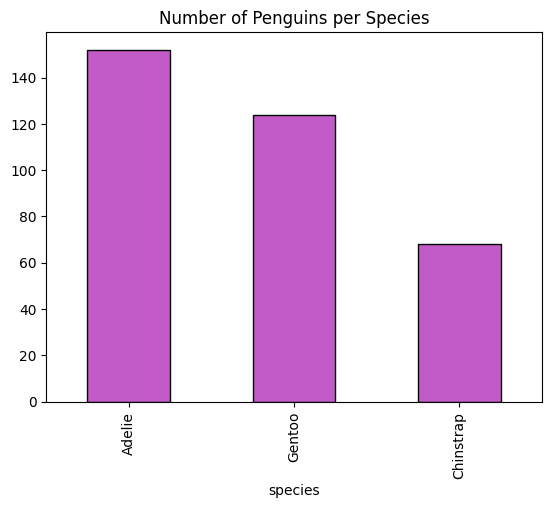

In [ ]:
# Bar chart of species counts
penguins["species"].value_counts().plot.bar(color="#c25bc8", edgecolor="black", title="Number of Penguins per Species")


> *Notes:*
> - `.value_counts()` gives the counts of each category  
> - `.plot.bar()` makes a vertical bar chart (use `.plot.barh()` for horizontal)  


We can also show counts of multiple categories **stacked on top of each other**.

<Axes: title={'center': 'Penguin Counts by Species and Sex (stacked)'}, xlabel='species'>

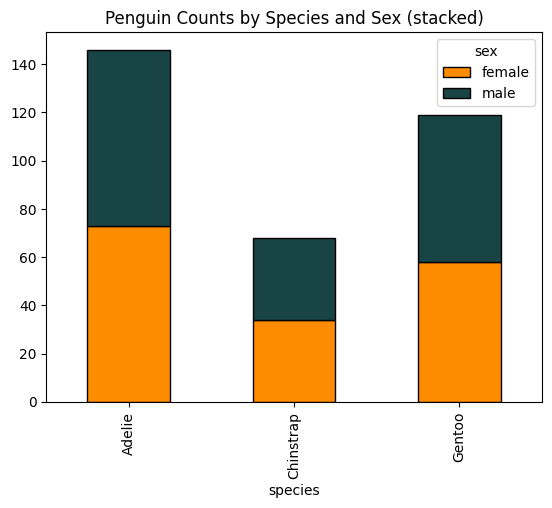

In [ ]:
# Count of species split by sex (stacked bars)
penguins.groupby(["species", "sex"]).size().unstack().plot.bar(stacked=True, color=["darkorange", "#184445"], edgecolor="black", title="Penguin Counts by Species and Sex (stacked)")


Instead of stacking, we can put bars **side by side** for easier comparisons.  
This is sometimes called a “dodged” bar plot.

<Axes: title={'center': 'Penguin Counts by Species and Sex (stacked)'}, xlabel='species'>

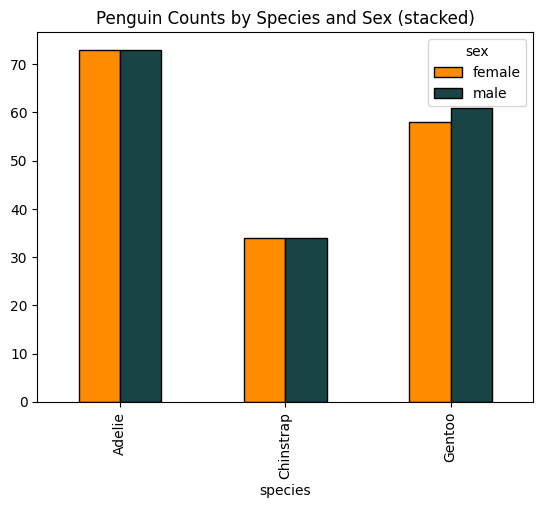

In [ ]:
# Count of species split by sex (stacked bars)
penguins.groupby(["species", "sex"]).size().unstack().plot.bar(stacked=False, color=["darkorange", "#184445"], edgecolor="black", title="Penguin Counts by Species and Sex (stacked)")

> *Notes:*
> - `stacked=True` → layers categories on top of each other  
> - `stacked=False` (default with multiple columns) → grouped bars side by side  


### Pie Plot
Pie charts are used to show **parts of a whole**. They are less precise than bar charts, but they can be useful for simple proportions.  
We will only use them occasionally - bar plots are usually better for comparisons.


<Axes: title={'center': 'Species Distribution'}, ylabel='count'>

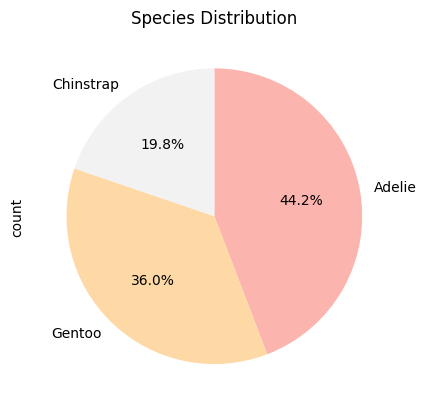

In [ ]:
# Pie chart of species counts
penguins["species"].value_counts().plot.pie(
    autopct="%.1f%%",     # show percentages
    startangle=90,        # rotate so first slice starts at 12 o'clock
    counterclock=False,   # draw slices clockwise
    colormap="Pastel1",   # use a color palette
    title="Species Distribution"
)


<Axes: title={'center': 'Species Distribution'}, ylabel='count'>

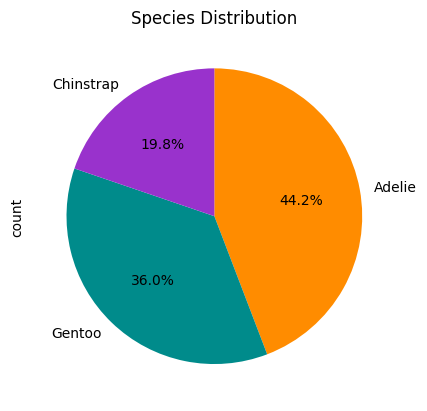

In [ ]:
# Define the original Palmer Penguins colors
penguin_colors = ["#FF8C00", "#008B8B", "#9932CC"]

penguins["species"].value_counts().plot.pie(
    autopct="%.1f%%",      # show percentages
    startangle=90,         # rotate so first slice starts at 12 o'clock
    counterclock=False,    # draw slices clockwise
    colors=penguin_colors, # use custom palette
    title="Species Distribution"
)


### Scatterplot
Scatterplots show the **relationship between two continuous variables**.  
Unlike histograms, here we need both an `x` and a `y` variable.  

> *Recall*: `.plot.scatter()` works only on a **DataFrame** (not a single Series).

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

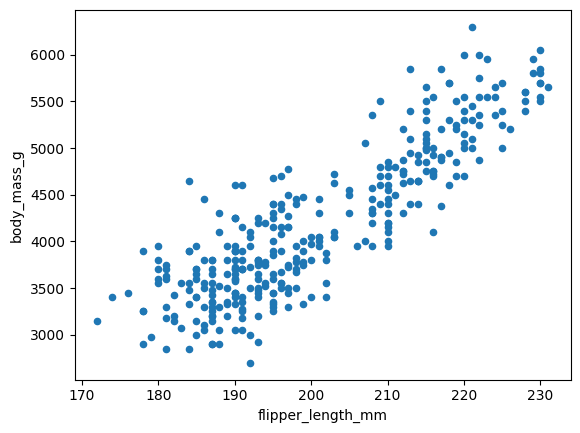

In [ ]:
# Basic scatterplot: flipper length vs body mass
penguins.plot.scatter(x="flipper_length_mm", y="body_mass_g")

Let's enhance it by **mapping color to species**, which makes the groups easier to see.

/tmp/ipython-input-2412744933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species_color"] = df["species"].map(penguin_colors)


<Axes: title={'center': 'Bill Length vs Bill Depth (colored by species)'}, xlabel='bill_length_mm', ylabel='bill_depth_mm'>

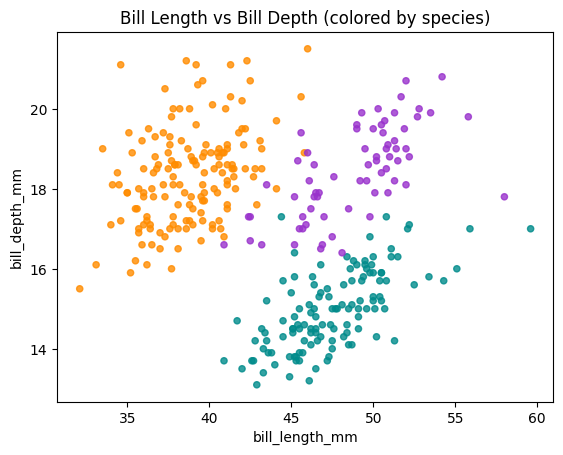

In [ ]:
# Drop NAs
df = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "species"])

# Define the original Palmer penguins colors
penguin_colors = {
    "Adelie": "#FF8C00",    # dark orange
    "Chinstrap": "#9932CC", # purple
    "Gentoo": "#008B8B"     # teal
}

# Map each species to its color
df["species_color"] = df["species"].map(penguin_colors)

# Pandas scatter plot using custom colors
df.plot.scatter(
    x="bill_length_mm",
    y="bill_depth_mm",
    c=df["species_color"],    # supply actual colors, not colormap
    alpha=0.8,
    title="Bill Length vs Bill Depth (colored by species)"
)


## From `Pandas` to `Matplotlib`

As we saw, `Pandas`’ built-in plotting functions are **great for quick visualizations**.  
They are especially useful while you are working on a project and just want to check the data.  

But if we want **more flexibility and customization**, then **`Matplotlib`** is the true workhorse of plotting in Python.  
It gives us control over almost every aspect of a figure: size, colors, markers, labels, titles, styles, and more.  

Below are some **main concepts** to keep in mind when using `Matplotlib`:
- **Figure**: the whole canvas (can contain multiple plots)  
- **Axes**: one plot (with *x*- and *y*-axis, labels, etc.)  
- **Axis**: individual *x*- or *y*-axis  
- **Artist**: everything visible (lines, points, text, legends…)  

![cheatsheet1.png](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)
![cheatsheet2.png](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png)

Let’s start with a very simple example.

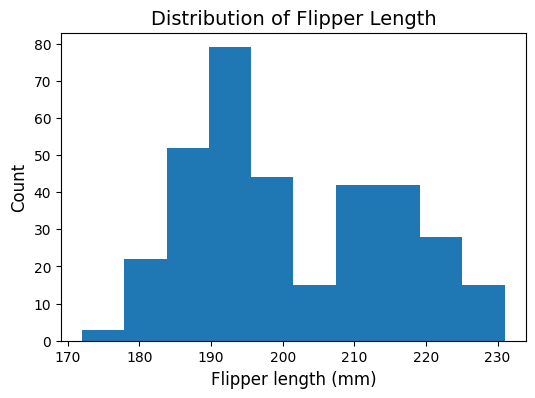

In [ ]:
# Basic histogram with Matplotlib
# Drop missing values to avoid errors
flipper_lengths = penguins["flipper_length_mm"].dropna()

# Create a histogram
plt.hist(flipper_lengths)

# Add title and axis labels
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Count")

# Show the figure
plt.show()

That’s the most basic `Matplotlib` plot: `plt.hist()` creates a histogram, then we add a title and axis labels.  

Notice how similar this is to what we did with **`Pandas`’ built-in plotting**.  
**Other common Matplotlib functions:**
- `plt.plot()` → line plot  
- `plt.scatter()` → scatter plot  
- `plt.bar()` / `plt.barh()` → bar charts  
- `plt.boxplot()` → boxplots  
- `plt.pie()` → pie charts  
In other words: **the same figures we made in `Pandas` can also be made here in `Matplotlib`**, but `Matplotlib` allows finer control over style, layout, labels, colors, and more.


### Figure Size and Style

We often want to control how our plots look. There are **two main ways**:

1. **Globally with `rcParams`** (applies to all plots in the notebook):  
```python
plt.rcParams["figure.figsize"] = (6,4)   # default size (width, height in inches)
plt.rcParams["axes.labelsize"] = 12      # font size of axis labels
plt.rcParams["axes.titlesize"] = 14      # font size of titles
```
2. Per-plot inside `plt.figure()` or `plt.subplots()` (only affects one plot):
```python
fig, ax = plt.subplots(figsize=(6,4))    # create one figure and one axes
ax.hist(flipper_lengths, bins=20)        # histogram with 20 bins
ax.set_title("Distribution of Flipper Length")  # set title for this axes
```

Text(0.5, 1.0, 'Distribution of Flipper Length')

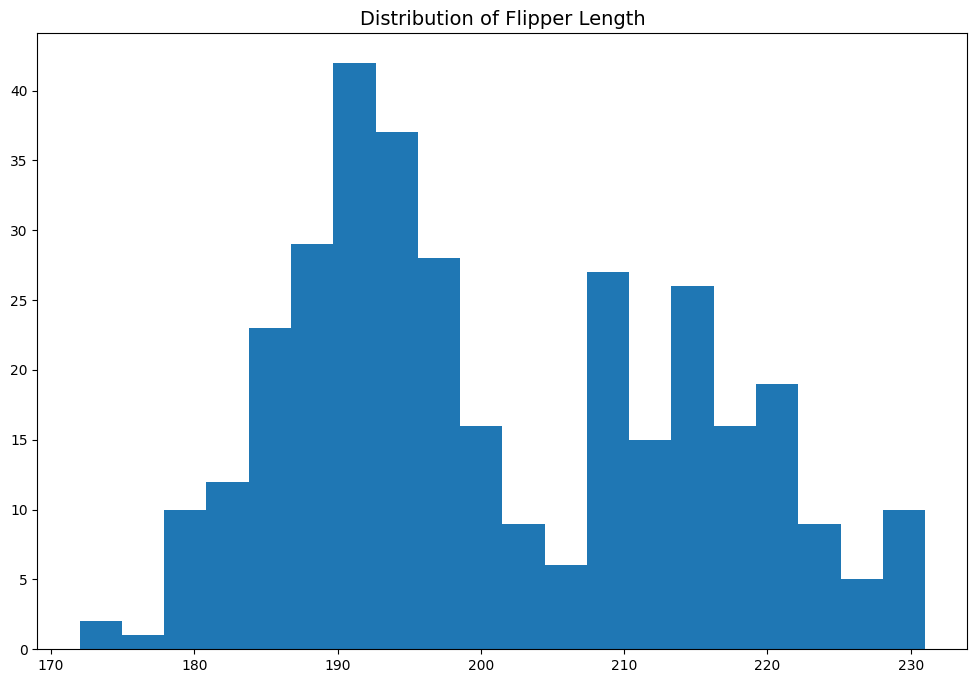

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))    # create one figure and one axes
ax.hist(flipper_lengths, bins=20)        # histogram with 20 bins
ax.set_title("Distribution of Flipper Length")  # set title for this axes

> *Note:* The object-oriented approach with `fig, ax = plt.subplots()` is recommended, because it gives us full control.

### <font color='gold'> Task 1 </font>  
Create a scatter plot of **bill length vs. bill depth** using **`Matplotlib`**.

Your plot should:
- Color the points based on species  
- Use **different marker shapes** for each species  
- Add a legend to explain the encoding  

> *Hints:*
> - Use `fig, ax = plt.subplots()` to create a figure and axes.  
> - Use `ax.scatter(x=..., y=..., ...)` for plotting each group.  
> - Filter the dataset with `df[df["species"] == "Adelie"]` (and similarly for the others).  
> - Assign **custom colors**: for example, use the original Palmer Penguins palette (see below)
> - Assign **different markers**: try `"o"` (circle), `"s"` (square), `"^"` (triangle).  
> - Use `ax.set_xlabel()`, `ax.set_ylabel()`, and `ax.set_title()` for labels.  
> - Add the legend with `ax.legend(title="Species")`.


In [ ]:
# Define custom colors
penguin_colors = {
    "Adelie": "#FF8C00",    # orange
    "Chinstrap": "#9932CC", # purple
    "Gentoo": "#008B8B"     # teal
}

# YOUR CODE HERE!

### Subplots

With `plt.subplots(rows, cols)` you create a **grid of Axes** to draw into.

> *Typical workflow:*
> 1. Create a grid of axes with `fig, axes = plt.subplots(nrows, ncols, figsize=(...))`  
> 2. Loop over your groups (e.g., years)  
> 3. For each group, select the matching `ax` and plot there  
> 4. Tidy labels, titles, legends, colorbars


For showing this in practice, let’s focus on **Gentoo penguins**.  

We will:  
- filter the dataset to include only Gentoo penguins,  
- split the plot into one **subplot per year**,  
- and map multiple variables at once:  
  - **color** = `bill_depth_mm` (continuous gradient),  
  - **size** = `bill_length_mm` (continuous → point size),  
  - **shape** = `sex` (categorical markers).  

This way, we can see how `plt.subplots()` combined with a for-loop gives us control similar to R’s `facet_wrap`.




In [ ]:
gentoo = penguins[penguins["species"] == "Gentoo"].copy()

In [ ]:
gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


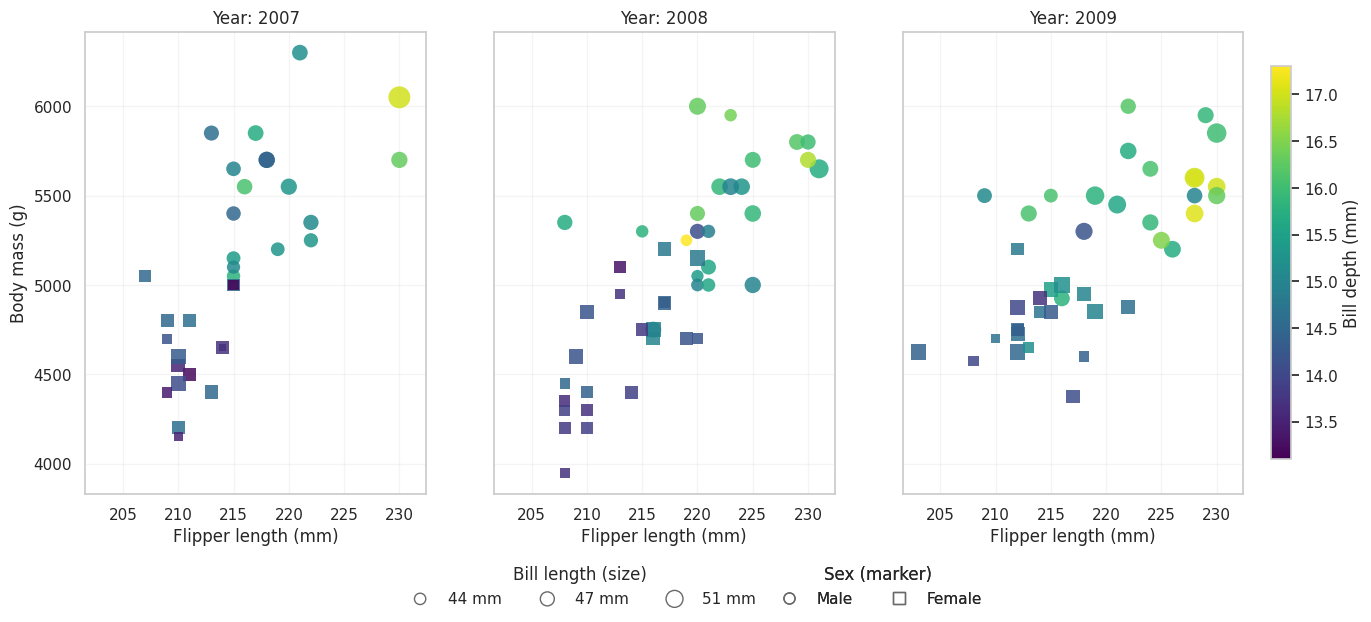

In [ ]:
''' Here we are:
1. Selecting only the Gentoo penguins (`species == "Gentoo"`).
2. Removing all rows where some information is missing (`dropna()`).
   This makes sure our dataset is clean so plotting functions don’t break.
3. Resetting the index (`reset_index(drop=True)`), because after filtering and dropping
   rows the original row numbers are preserved, leaving gaps (e.g., 0, 3, 7, ...).
   Renumbering the index is not strictly required for plotting,
   but it keeps the DataFrame tidy, avoids confusion when using `.iloc`,
   and is generally good practice after filtering.'''
gentoo = penguins[penguins["species"] == "Gentoo"].dropna().reset_index(drop=True)

# Encodings
# Color (continuous): bill depth with shared scale across facets
vmin, vmax = gentoo["bill_depth_mm"].min(), gentoo["bill_depth_mm"].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)
cmap = "viridis"

# Size (continuous): bill length → area in points^2
bl_min, bl_max = gentoo["bill_length_mm"].min(), gentoo["bill_length_mm"].max()
def size_map(x):
    rng = (bl_max - bl_min) if (bl_max - bl_min) != 0 else 1.0
    return 30 + ((x - bl_min) / rng) * 220   # tweak base/max to taste

# Marker (categorical): sex
marker_by_sex = {"male": "o", "female": "s"}

# Facet keys
years = np.sort(gentoo["year"].unique())
n = len(years)

# Subplots
fig, axes = plt.subplots(1, n, figsize=(6*n, 6), sharex=True, sharey=True)
axes = np.atleast_1d(axes).ravel()

# Plot
for ax, yr in zip(axes, years):
    panel = gentoo[gentoo["year"] == yr]
    for sex, marker in marker_by_sex.items():
        sub = panel[panel["sex"] == sex]
        if sub.empty:
            continue
        ax.scatter(
            sub["flipper_length_mm"],
            sub["body_mass_g"],
            c=sub["bill_depth_mm"],      # color by bill depth (continuous)
            cmap=cmap, norm=norm,
            s=size_map(sub["bill_length_mm"]),  # size by bill length (continuous)
            marker=marker,
            alpha=0.85,
            edgecolors="none",
            label=sex    # we won't use per-axes legends; we'll build a figure legend
        )
    ax.set_title(f"Year: {int(yr)}")
    ax.set_xlabel("Flipper length (mm)")
    ax.grid(alpha=0.2)

axes[0].set_ylabel("Body mass (g)")

# Colorbar (continuous color)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, location="right", shrink=0.85, pad=0.02)
cbar.set_label("Bill depth (mm)")

# Legend A: marker shape = sex (custom, fixed neutral color)
sex_handles = [
    Line2D([0], [0], marker=marker_by_sex["male"], linestyle="", markersize=8,
           markerfacecolor="none", markeredgecolor="dimgray", label="Male"),
    Line2D([0], [0], marker=marker_by_sex["female"], linestyle="", markersize=8,
           markerfacecolor="none", markeredgecolor="dimgray", label="Female"),
]

# Legend B: size = bill length (choose representative values)
size_vals = np.round(np.quantile(gentoo["bill_length_mm"], [0.1, 0.5, 0.9])).astype(int)
size_handles = [
    plt.scatter([], [], s=size_map(v), facecolors="none", edgecolors="dimgray", label=f"{v} mm")
    for v in size_vals
]

# Place legends so they don't overlap plots (tweak anchors as you like)
leg1 = fig.legend(sex_handles, [h.get_label() for h in sex_handles],
                  title="Sex (marker)", loc="lower left", ncol=2,
                  frameon=False, bbox_to_anchor=(0.5, -0.1))

leg2 = fig.legend(size_handles, [h.get_label() for h in size_handles],
                  title="Bill length (size)", loc="lower center", ncol=len(size_handles),
                  frameon=False, bbox_to_anchor=(0.4, -0.1))

fig.add_artist(leg1)  # ensure both legends render

plt.show()



## `Seaborn`

Why Seaborn?
- **Built on Matplotlib** → you still get full control when needed.
- **Declarative mappings** → specify *what* each variable does (`hue`, `size`, `style`) instead of how to draw it.
- **Tidy-data friendly** → one row per observation, one column per variable.
- **Smart defaults** → nicer themes, legends, and sensible scales out of the box.
- **Facetting** → split data into small multiples via `col=`, `row=` (figure-level functions like `relplot`, `catplot`, `displot`).

Two API levels:
- **Axes-level** (e.g., `sns.scatterplot`, `sns.boxplot`) → draw on a given `ax`
- **Figure-level** (e.g., `sns.relplot`, `sns.catplot`, `sns.displot`) → creates an entire figure/grid (uses `FacetGrid` under the hood)


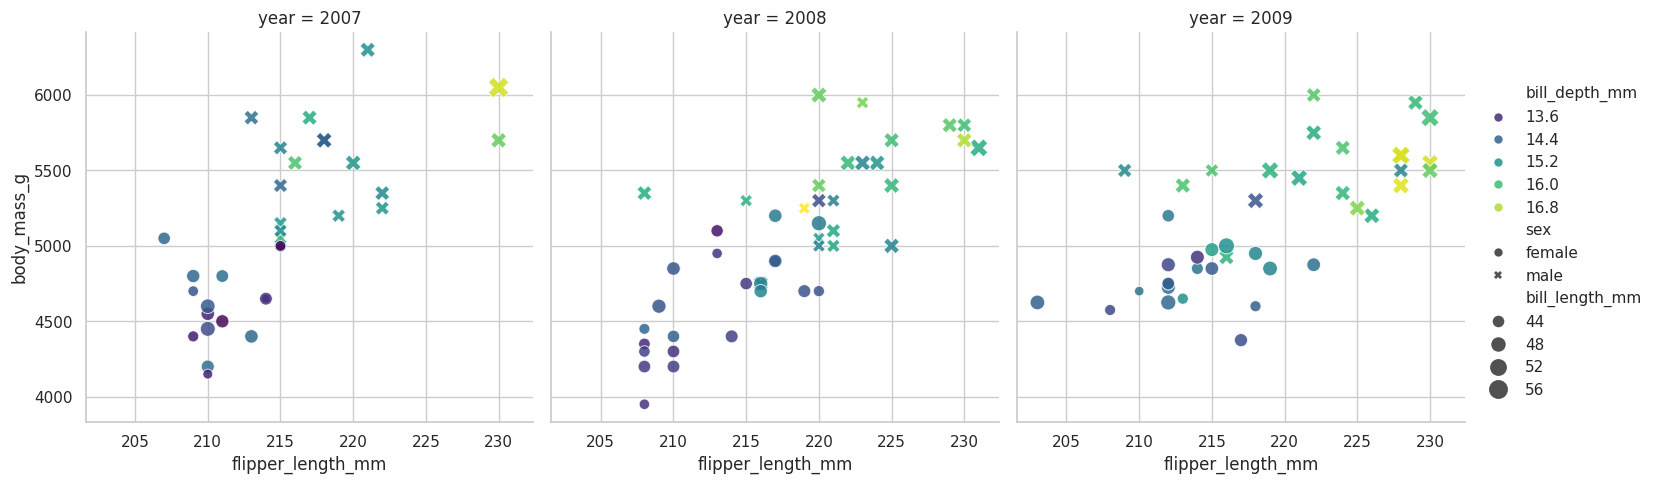

In [ ]:
# Theme & scale (applies to all Seaborn plots)
sns.set_theme(style="whitegrid", context="notebook")

sns.relplot(
    data=gentoo,
    x="flipper_length_mm", y="body_mass_g",
    col="year", col_order=np.sort(gentoo["year"].unique()),
    hue="bill_depth_mm",            # continuous color
    size="bill_length_mm",          # continuous size
    style="sex",                    # categorical marker
    kind="scatter",
    palette="viridis",              # works with continuous hue
    sizes=(40, 220),                # min/max marker area
    alpha=0.85,
    facet_kws={"sharex": True, "sharey": True},
    height=5, aspect=1.0
)

As you see, we almost already get the **same plot as with `Matplotlib`** - but with much less code!  
That’s the power of `Seaborn`: smart defaults and a declarative API.

However, two details still need fixing:  
- The **axis titles**; we usually want to make them more descriptive.  
- The **color legend** for `bill_depth_mm` currently shows **discrete steps**, while our variable is actually **continuous** - so a gradient colorbar would be more appropriate.

Luckily, `Seaborn` is built on `Matplotlib`, so we can easily customize these things further.


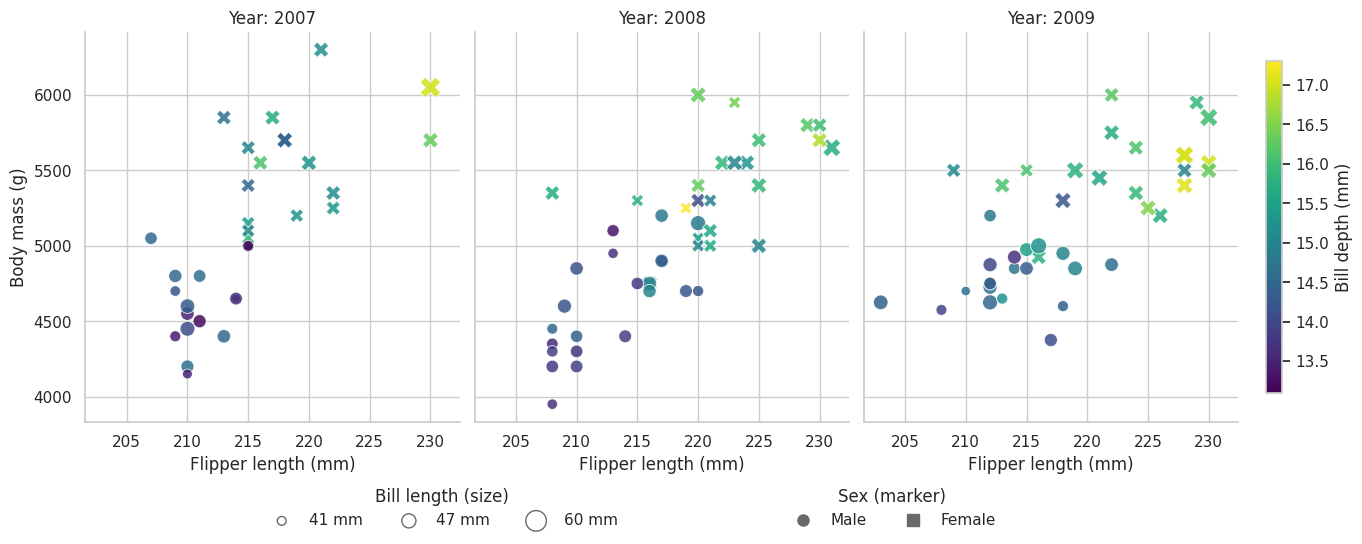

In [ ]:
norm = plt.Normalize(gentoo.bill_depth_mm.min(), gentoo.bill_depth_mm.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

plot_gentoo = sns.relplot(data=gentoo, x="flipper_length_mm", y="body_mass_g",
                          col="year", col_order=np.sort(gentoo["year"].unique()), hue="bill_depth_mm", size="bill_length_mm",
                          style="sex", kind="scatter", palette="viridis", sizes=(40, 220), alpha=0.85,
                          facet_kws={"sharex": True, "sharey": True}, height=5, aspect=1.0, legend=False)

cbar = fig.colorbar(sm, ax=plot_gentoo.axes.ravel().tolist(), location="right", shrink=0.85, pad=0.02)
cbar.set_label("Bill depth (mm)")

# Set axis labels through the FacetGrid object
plot_gentoo.set_axis_labels("Flipper length (mm)", "Body mass (g)")
plot_gentoo.set_titles("Year: {col_name}")

# Sex legend (marker shape only)
sex_handles = [
    Line2D([0], [0], marker="o", color="dimgray", linestyle="", markersize=8, label="Male"),
    Line2D([0], [0], marker="s", color="dimgray", linestyle="", markersize=8, label="Female")
]

# Size legend (bill length mm) — pick representative values
size_vals = [gentoo.bill_length_mm.min(), gentoo.bill_length_mm.median(), gentoo.bill_length_mm.max()]
size_handles = [
    plt.scatter([], [], s=np.interp(v, [min(size_vals), max(size_vals)], [40, 220]),
                facecolors="none", edgecolors="dimgray", label=f"{v:.0f} mm")
    for v in size_vals
]

# Place the legends on the figure
leg1 = plot_gentoo.fig.legend(handles=sex_handles, title="Sex (marker)", loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.6, -0.1))

leg2 = plot_gentoo.fig.legend(handles=size_handles, title="Bill length (size)", loc="lower center", ncol=len(size_handles), frameon=False, bbox_to_anchor=(0.3, -0.1))

## `Plotnine`
Still feels like too much hassle?  
**Good news:** Python users can also make plots in the **same style as R’s `ggplot2`** by using a library called [**`plotnine`**](https://plotnine.org/).  

It follows the same [**Grammar of Graphics**](https://link.springer.com/book/10.1007/0-387-28695-0) logic:
- start with `ggplot(data, aes(...))`  
- add layers with `+ geom_*`  
- add faceting, scales, and themes  

So if you know `ggplot2` in R, you’ll feel right at home in Python with `plotnine`.
> To see the parallels, check the **R users’ notebook** — the syntax is almost identical!

In [ ]:
from plotnine import (
    ggplot, aes, geom_point, facet_wrap,
    scale_color_cmap, scale_size_continuous,
    labs, theme_bw, theme, guides, guide_legend, guide_colourbar
)

> We import individual functions from plotnine instead of importing the whole library.
> Why?
> - This makes the code shorter to write (no need to prefix with "p9.").
> - It also makes it clearer which parts of plotnine we are actually using in this notebook.
>
> Another common option is:
> ```python   
> import plotnine as p9
> ```
> Then you would write code like:
> ```python   
> p9.ggplot(...) + p9.aes(...) + p9.geom_point(...)
> ```
> Both approaches are valid:
> - `from plotnine import ...` is concise and keeps the syntax closer to R's `ggplot2`.
> - `import plotnine as p9` can be useful if you want to see explicitly where functions come from.

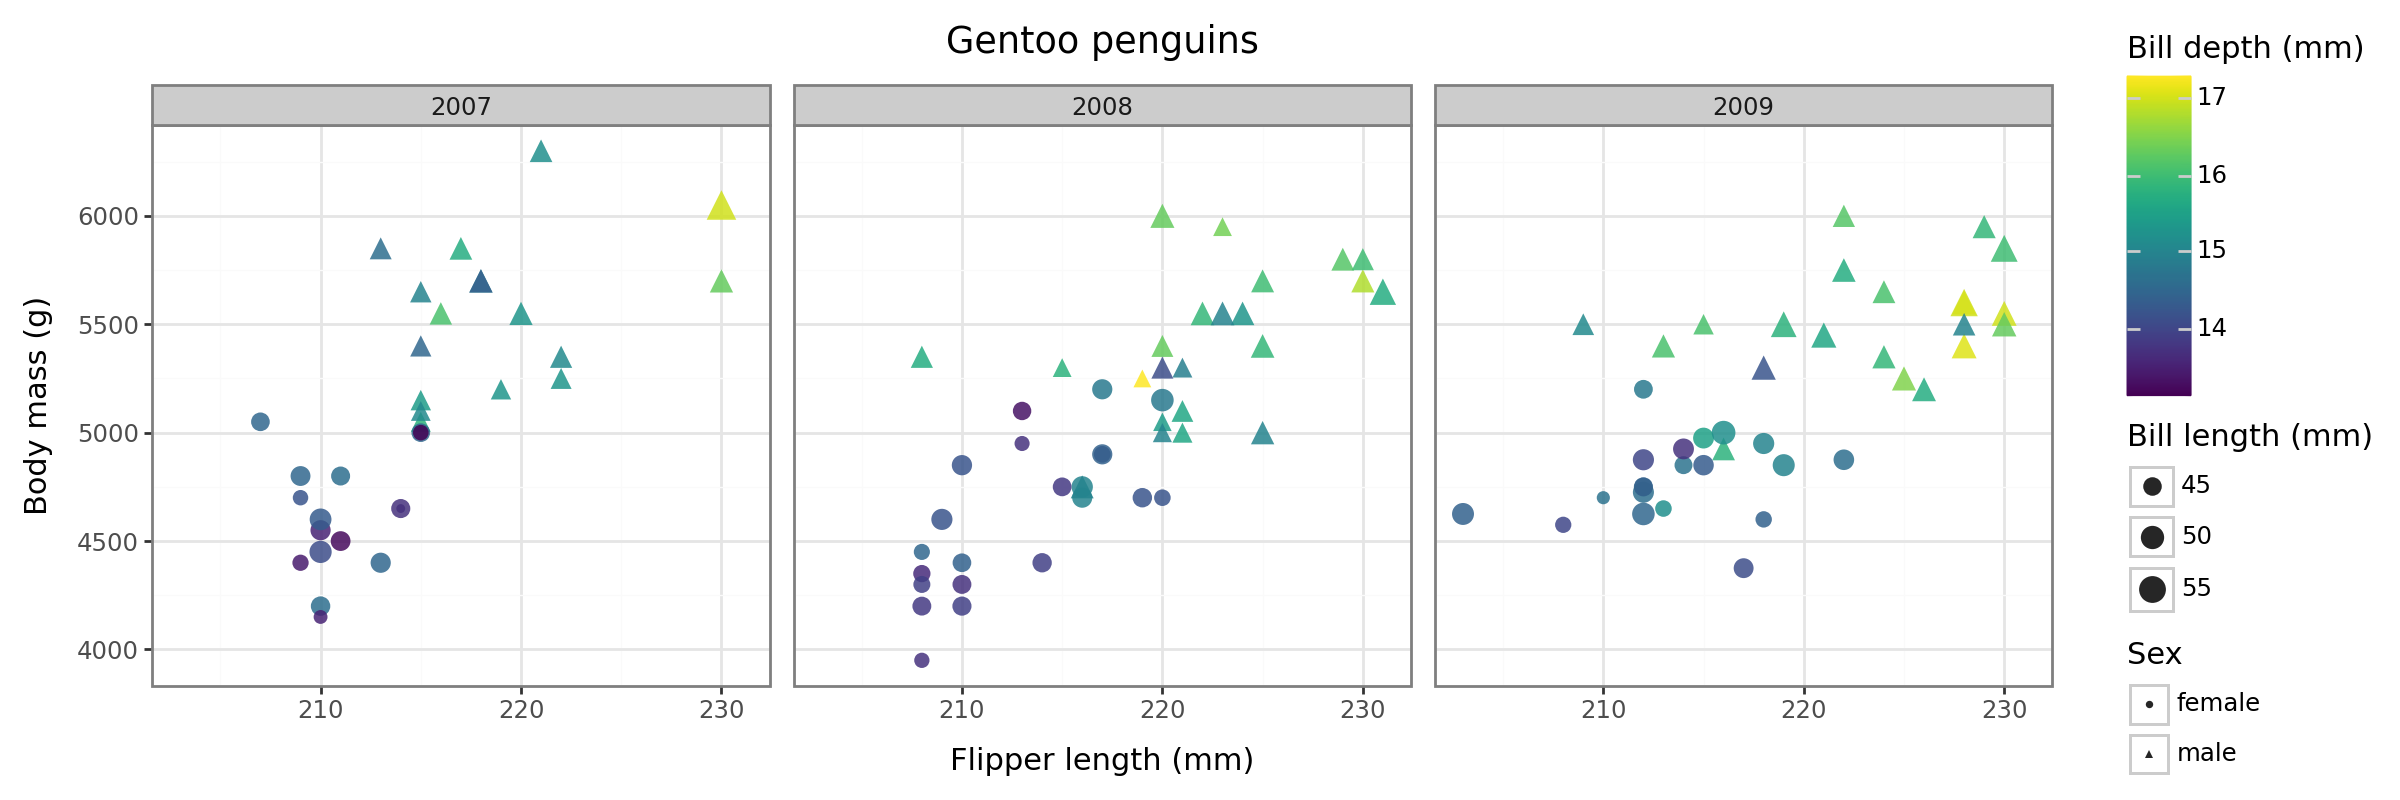

In [ ]:
p = (
    ggplot(gentoo, aes(
        x="flipper_length_mm",
        y="body_mass_g",
        color="bill_depth_mm",    # continuous → gradient/colorbar
        size="bill_length_mm",    # continuous → point size
        shape="sex"               # categorical → shapes
    ))
    + geom_point(alpha=0.85, stroke=0)          # stroke=0 removes edges (like edgecolors='none')
    + facet_wrap("~ year")                       # one panel per year
    + scale_color_cmap(name="Bill depth (mm)", cmap_name="viridis")  # continuous colorbar
    + scale_size_continuous(name="Bill length (mm)", range=(1.8, 6)) # adjust marker size range
    + labs(
        x="Flipper length (mm)",
        y="Body mass (g)",
        shape="Sex",
        title="Gentoo penguins"
    )
    + theme_bw()
    # Tidy legends: keep colorbar for continuous color, keep legends for size/shape
    + guides(
        color=guide_colourbar(),
        size=guide_legend(title="Bill length (mm)"),
        shape=guide_legend(title="Sex")
    )
    + theme(
        figure_size=(12, 4),      # width, height in inches
        legend_position="right"   # move legends if needed ("top", "bottom", etc.)
    )
)
p

### <font color='gold'> Task 2 </font>  

Using the **`plotnine`**, make a scatter plot of **bill length vs bill depth**, but this time **color the points by species**.  

> <font color='gold'> For solving this (and the following exercises), make sure to also refer to the **R users’ notebook**.  
Not just for comparing syntax, but to really understand the **Grammar of Graphics logic** behind the plots. You can also check the [`plotnine` documentation and examples](https://plotnine.org/guide/aesthetic-mappings.html) - they mirror `ggplot2` in R and are an excellent way to see how the pieces fit together. </font>


In [ ]:
# YOUR CODE HERE!

### <font color='gold'> Task 3 </font>

Using **only Gentoo** penguins, create a plot that shows:
- **y:** body mass (`body_mass_g`)
- **x:** flipper length (`flipper_length_mm`)
- **color:** bill depth (`bill_depth_mm`) *(continuous → gradient)*
- **size:** bill length (`bill_length_mm`)
- **shape:** gender (`sex`)
- Add **year (`year`)** as text labels on the plot.

> *Hints:*
> - Filter first with a boolean mask (e.g., `df[df["species"] == "Gentoo"]`) and then `dropna(subset=[...])` for the columns you map.
> - In `Seaborn`/`Matplotlib`, you can add labels with `ax.text(...)` in a loop. For nicer label placement, the optional `adjustText` package can help.
> - In `plotnine`, map `label='year'` in `aes(...)` and add `geom_text(...)` (note: no automatic repel by default).


In [ ]:
# YOUR CODE HERE!

### <font color='gold'> Task 4 </font>  
Create a faceted plot of penguins where:  
- **x:** body mass (`body_mass_g`)  
- **y:** flipper length (`flipper_length_mm`)  
- **color:** sex (`sex`)  
- **rows of facets:** species (`species`)  
- **columns of facets:** year (`year`)  

This way, each small panel will show one species in one year, with male and female penguins in different colors.  


> *Hint for `plotnine` users:* Depending on what you need, you might have to import additional elements from the library (e.g., `facet_grid`)


In [ ]:
# YOUR CODE HERE!

### <font color='gold'> Task 5 </font>  
**Make a meaningful plot** using the *penguins* dataset that tells a clear story.  
Use everything we’ve learned so far - and feel free to get inspiration from the internet (cite sources if you borrow ideas).


In [ ]:
# YOUR CODE HERE!

## Saving Figures

In Python, saving figures depends on the library you are using:

1.  **`Matplotlib` / `Seaborn`:**  
  Use [`plt.savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).
    ```python
    plt.savefig("figure.png", dpi=300, bbox_inches="tight")
    ```
    - `dpi=300` → high resolution (good for publications)
    - `bbox_inches="tight"` → trims excess white space

2. `Plotnine`:\
    Use the `.save()` method of a ggplot object (similar to ggsave() in R).
     - If you provide only a filename, the plot is saved with the current default size.
     - You can also specify width, height (in inches), and dpi.
    ```python
    p = (ggplot(...) + geom_point(...))   # build your plot
    p.save("figure.png", width=7, height=5, dpi=300)
    ```
   

### <font color='gold'> Task 6 </font>  

Take the **plot you created in `Task 5`** (your own meaningful plot) and **save it to a file** on your computer using `ggsave()`.

**Requirements**
- Save as **PNG** (recommended for slides/web).  
- Specify a **custom width and height** (in inches).  
- Use a **high resolution** (`dpi = 300` or higher).  
- Give the file a clear and descriptive name (e.g., `"gentoo_flipper_mass.png"`).  


In [ ]:
# YOUR CODE HERE!